<a href="https://colab.research.google.com/github/Vivek-hub3112/Machine-Learning/blob/main/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K Mean clustering

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('/income.csv')
print(df)



        Name  Age  Income($)
0        Rob   27      70000
1    Michael   29      90000
2      Mohan   29      61000
3     Ismail   28      60000
4       Kory   42     150000
5     Gautam   39     155000
6      David   41     160000
7     Andrea   38     162000
8       Brad   36     156000
9   Angelina   35     130000
10    Donald   37     137000
11       Tom   26      45000
12    Arnold   27      48000
13     Jared   28      51000
14     Stark   29      49500
15    Ranbir   32      53000
16    Dipika   40      65000
17  Priyanka   41      63000
18      Nick   43      64000
19      Alia   39      80000
20       Sid   41      82000
21     Abdul   39      58000


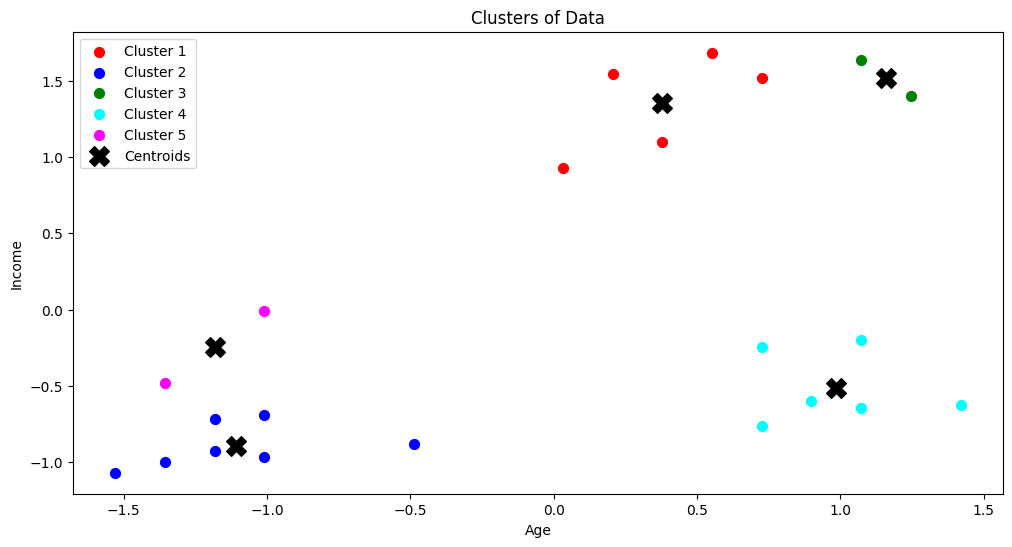

In [ ]:
X = df.iloc[:, [1, 2]].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans
plt.figure(figsize=(12, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Clusters of Data')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [ ]:
df['Cluster'] = y_kmeans
df.to_csv('clustered_output.csv', index=False)
print(df)

        Name  Age  Income($)  Cluster
0        Rob   27      70000        4
1    Michael   29      90000        4
2      Mohan   29      61000        1
3     Ismail   28      60000        1
4       Kory   42     150000        2
5     Gautam   39     155000        0
6      David   41     160000        2
7     Andrea   38     162000        0
8       Brad   36     156000        0
9   Angelina   35     130000        0
10    Donald   37     137000        0
11       Tom   26      45000        1
12    Arnold   27      48000        1
13     Jared   28      51000        1
14     Stark   29      49500        1
15    Ranbir   32      53000        1
16    Dipika   40      65000        3
17  Priyanka   41      63000        3
18      Nick   43      64000        3
19      Alia   39      80000        3
20       Sid   41      82000        3
21     Abdul   39      58000        3


You are given a dataset containing annual income and spending score of customers in a mall.

Initially, assume all data points belong to a single cluster.

Your task is to perform Divisive Hierarchical Clustering (Top-Down approach) by splitting clusters step-by-step.
data = {
    'Annual_Income': [15, 16, 18, 20, 22, 25, 28, 30, 35, 40],
    'Spending_Score': [39, 42, 45, 50, 52, 55, 60, 65, 70, 75]
}
Create a DataFrame using the given data

Scale the features using StandardScaler

Start with one cluster containing all data points

Apply top-down clustering logic:

First split the data into 2 clusters

Then split one of the clusters again to make 3 clusters

After each split:

Print the number of clusters

Print cluster labels

Visualize the final clusters using a scatter plot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
data = { 'Annual_Income': [15, 16, 18, 20, 22, 25, 28, 30, 35, 40],
        'Spending_Score': [39, 42, 45, 50, 52, 55, 60, 65, 70, 75] }

df = pd.DataFrame(data)
print(df)


   Annual_Income  Spending_Score
0             15              39
1             16              42
2             18              45
3             20              50
4             22              52
5             25              55
6             28              60
7             30              65
8             35              70
9             40              75


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# --- STEP 1: Start with 1 cluster ---
print("--- Initial State: 1 Cluster ---")
labels_1 = np.zeros(len(df), dtype=int)
print(f"Number of clusters: 1")
print(f"Cluster labels: {labels_1}")


--- Initial State: 1 Cluster ---
Number of clusters: 1
Cluster labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:

# --- STEP 2: Split into 2 clusters ---
# Use K-Means to find the first split
print("\n--- Split 1: 2 Clusters ---")
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(X_scaled)
print(f"Number of clusters: 2")
print(f"Cluster labels: {labels_2}")


--- Split 1: 2 Clusters ---
Number of clusters: 2
Cluster labels: [0 0 0 0 0 0 1 1 1 1]


In [ ]:
# --- STEP 3: Split one of the clusters to make 3 clusters ---
# We calculate the SSE (Inertia) for each cluster to decide which to split
sse = []
for i in range(2):
    cluster_points = X_scaled[labels_2 == i]
    centroid = kmeans_2.cluster_centers_[i]
    sse.append(np.sum((cluster_points - centroid) ** 2))

# Identify the cluster with the highest SSE (highest variance)
cluster_to_split = np.argmax(sse)
print(f"\nCluster chosen to split further: {cluster_to_split} (Highest SSE: {sse[cluster_to_split]:.2f})")




Cluster chosen to split further: 0 (Highest SSE: 2.60)


In [ ]:
# Split the chosen cluster into two
kmeans_sub = KMeans(n_clusters=2, random_state=42, n_init=10)
subset_indices = np.where(labels_2 == cluster_to_split)[0]
subset_labels = kmeans_sub.fit_predict(X_scaled[subset_indices])

# Assign new label (2) to the newly formed group from the split
labels_3 = labels_2.copy()
for idx, sub_label in zip(subset_indices, subset_labels):
    if sub_label == 1:
        labels_3[idx] = 2  # New cluster label
    else:
        labels_3[idx] = cluster_to_split

print("--- Split 2: 3 Clusters ---")
print(f"Number of clusters: 3")
print(f"Cluster labels: {labels_3}")



--- Split 2: 3 Clusters ---
Number of clusters: 3
Cluster labels: [0 0 0 2 2 2 1 1 1 1]


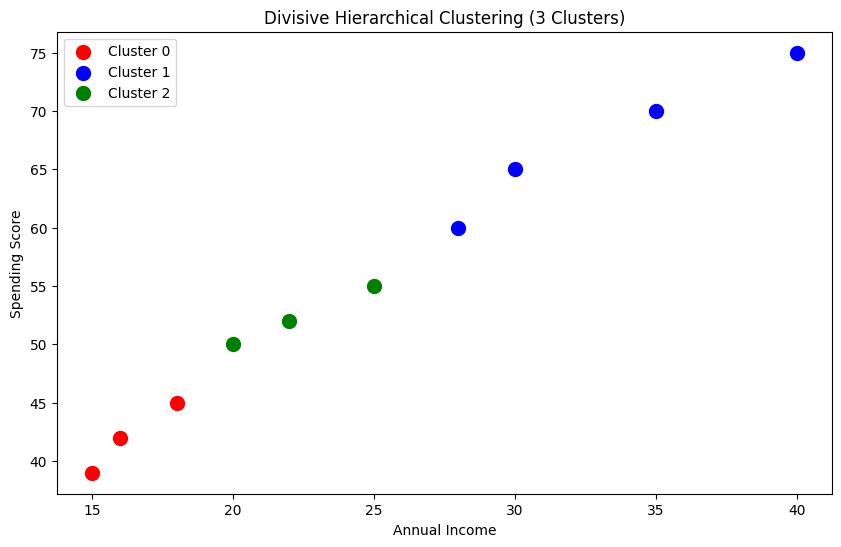

In [ ]:
# 3. Visualization
plt.figure(figsize=(10, 6))
unique_labels = np.unique(labels_3)
colors = ['red', 'blue', 'green']
for i, label in enumerate(unique_labels):
    plt.scatter(df.iloc[labels_3 == label, 0],
                df.iloc[labels_3 == label, 1],
                c=colors[i], label=f'Cluster {label}', s=100)

plt.title('Divisive Hierarchical Clustering (3 Clusters)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ------------------------------------------
# Step 2: Load Iris dataset
# ------------------------------------------
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['Target'] = y

print("Dataset Preview:\n")
print(df.head())

# ------------------------------------------
# Step 3: Feature Scaling (VERY IMPORTANT)
# ------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------------------
# Step 4: Apply PCA
# ------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA result to DataFrame
pca_df = pd.DataFrame(
    X_pca,
    columns=['Principal Component 1', 'Principal Component 2']
)

pca_df['Target'] = y

print("\nPCA Data Preview:\n")
print(pca_df.head())


Dataset Preview:

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]

PCA Data Preview:

   Principal Component 1  Principal Component 2  Target
0              -2.264703               0.480027       0
1              -2.080961              -0.674134       0
2              -2.364229              -0.341908       0
3              -2.299384              -0.597395       0
4              -2.389842               0.646835       0
